In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors, cm
import os
import re
import seaborn as sns
from itertools import cycle
from collections import namedtuple
import Bio
from Bio.PDB import PDBParser
from biopandas.pdb import PandasPdb
from scipy.spatial.distance import euclidean
import itertools
import utility
import networkx as nx
from GraphRicciCurvature.OllivierRicci import OllivierRicci
from GraphRicciCurvature.FormanRicci import FormanRicci
from sklearn import preprocessing
from itertools import combinations
import math
import heapq
import cvxpy as cvx
import networkit as nk
import time
from collections import Counter
import collections
from Nanoparticle import nodes, edges, no_weight, norm_weight, ollivier_ricci_node,ollivier_ricci_edge,edge_sort, node_connect_path, get_single_node_neighbors_distributions, source_target_shortest_path, optimal_transportation_distance, xyd, G_optimal_path_w, G_optimal_path, G_shortest_path, path_pd_all_w, path_pd_all, edge_node_vec, node_based_torsion, edge_node_vec_torsion, angle, mirror_point, find_pair_node_chiral, find_symmetric_point_and_plane_chiral, mirror_check_chiral, chirality_sign 


In [2]:
point_dir = os.path.join(os.getcwd(), 'SC_NP_points')

_base = math.e
_exp_power = 2
_alpha = 0.5
_nbr_topk = 1000
EPSILON = 1e-7 

In [3]:
csv_files = [f for f in os.listdir(point_dir) if f.endswith('.csv')]
csv_files = sorted(csv_files, key=lambda f: int(re.sub('\D', '', f)))
for num, name in enumerate(csv_files, start=0):
    print('csv_files {} : {}'. format(num, name))

csv_files 0 : 3.csv
csv_files 1 : 4.csv
csv_files 2 : 5.csv
csv_files 3 : 6.csv
csv_files 4 : 7.csv
csv_files 5 : 8.csv
csv_files 6 : 9.csv
csv_files 7 : 10.csv
csv_files 8 : 11.csv
csv_files 9 : 12.csv
csv_files 10 : 13.csv
csv_files 11 : 14.csv
csv_files 12 : 15.csv
csv_files 13 : 16.csv
csv_files 14 : 17.csv
csv_files 15 : 18.csv
csv_files 16 : 19.csv
csv_files 17 : 20.csv
csv_files 18 : 21.csv
csv_files 19 : 22.csv
csv_files 20 : 23.csv
csv_files 21 : 24.csv
csv_files 22 : 25.csv
csv_files 23 : 26.csv
csv_files 24 : 27.csv
csv_files 25 : 28.csv
csv_files 26 : 29.csv
csv_files 27 : 30.csv
csv_files 28 : 31.csv
csv_files 29 : 32.csv
csv_files 30 : 33.csv
csv_files 31 : 34.csv
csv_files 32 : 35.csv
csv_files 33 : 36.csv
csv_files 34 : 37.csv
csv_files 35 : 38.csv
csv_files 36 : 39.csv
csv_files 37 : 40.csv
csv_files 38 : 41.csv
csv_files 39 : 42.csv
csv_files 40 : 43.csv
csv_files 41 : 44.csv
csv_files 42 : 45.csv
csv_files 43 : 46.csv
csv_files 44 : 47.csv
csv_files 45 : 48.csv
csv_f

In [5]:
def get_point_pd(file_num):
    
    data = pd.read_csv(os.path.join(point_dir, csv_files[file_num]), skiprows=1, header=None)
    
    xyz = pd.DataFrame(np.zeros((len(data), 4)), columns=['ATOM', 'x', 'y', 'z'])

    for ii in range(len(data)):
        xyz['x'].iloc[ii] = float(data.iloc[ii][0].split()[0])
        xyz['y'].iloc[ii] = float(data.iloc[ii][0].split()[1])
        xyz['z'].iloc[ii] = float(data.iloc[ii][0].split()[2])
        xyz['ATOM'].iloc[ii] = 'Au'
     
    return xyz

In [11]:
#chiral clusters

xyz_17 = get_point_pd(17-3)
xyz_21 = get_point_pd(21-3)
xyz_44 = get_point_pd(44-3)
xyz_47 = get_point_pd(47-3)
xyz_69 = get_point_pd(69-3)
xyz_72 = get_point_pd(72-3)
xyz_78 = get_point_pd(78-3)

/home/minjcha/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
# chiral 
thre = 0.4

node17 = nodes(xyz_17)
edge17 = edges(xyz_17, node17, 2.48, thre)

node21 = nodes(xyz_21)
edge21 = edges(xyz_21, node21, 2.48, thre)

node44 = nodes(xyz_44)
edge44 = edges(xyz_44, node44, 2.48, thre)

node47 = nodes(xyz_47)
edge47 = edges(xyz_47, node47, 2.48, thre)

node69 = nodes(xyz_69)
edge69 = edges(xyz_69, node69, 2.48, thre)

node72 = nodes(xyz_72)
edge72 = edges(xyz_72, node72, 2.48, thre)

node78 = nodes(xyz_78)
edge78 = edges(xyz_78, node78, 2.48, thre)


In [13]:
#achiral clusters

xyz_15 = get_point_pd(15-3)
xyz_25 = get_point_pd(25-3)
xyz_35 = get_point_pd(35-3)
xyz_45 = get_point_pd(45-3)
xyz_55 = get_point_pd(55-3)
xyz_65 = get_point_pd(65-3)
xyz_75 = get_point_pd(75-3)

In [64]:
#achiral

node15 = nodes(xyz_15)
edge15 = edges(xyz_15, node15, 2.48, thre)

# node25 = nodes(xyz_25)
# edge25 = edges(xyz_25, node25, 2.48, thre)

# node35 = nodes(xyz_35)
# edge35 = edges(xyz_35, node35, 2.48, thre)

# node45 = nodes(xyz_45)
# edge45 = edges(xyz_45, node45, 2.48, thre)

# node55 = nodes(xyz_55)
# edge55 = edges(xyz_55, node55, 2.48, thre)

# node65 = nodes(xyz_65)
# edge65 = edges(xyz_65, node65, 2.48, thre)

# node75 = nodes(xyz_75)
# edge75 = edges(xyz_75, node75, 2.48, thre)


In [14]:
def pos_G(xyz, node, edge):
    
    pos = {ii: (xyz.iloc[ii,1:].to_numpy()) for ii in range(len(xyz))}
    G = nx.Graph()
    G.add_nodes_from(node)
    G.add_edges_from(edge)
    
    from mpl_toolkits.mplot3d import Axes3D
    n = G.number_of_nodes()
    edge_max = max([G.degree(i) for i in range(n)])
    colors = [plt.cm.plasma(G.degree(i)/edge_max) for i in range(n)] 
    with plt.style.context(('ggplot')):
        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]
            # Scatter plot
            ax.scatter(xi, yi, zi, c=colors[key], s=10+10*G.degree(key), edgecolors='k', alpha=0.7)
        for i,j in enumerate(G.edges()):
            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))
            # Plot the connecting lines
            ax.plot(x, y, z, c='black', alpha=0.5)
        ax.view_init(0, 0)

In [18]:
#chiral
#17
Gw_17 = norm_weight(xyz_17, node17, edge17)
G_17 = no_weight(node17, edge17)

orn_w17 = ollivier_ricci_node(Gw_17, 0.5)
ore_w17 = ollivier_ricci_edge(Gw_17,0.5)

orn_17 = ollivier_ricci_node(G_17, 0.5)
ore_17 = ollivier_ricci_edge(G_17,0.5)


#21
Gw_21 = norm_weight(xyz_21, node21, edge21)
G_21 = no_weight(node21, edge21)

orn_w21 = ollivier_ricci_node(Gw_21, 0.5)
ore_w21 = ollivier_ricci_edge(Gw_21,0.5)

orn_21 = ollivier_ricci_node(G_21, 0.5)
ore_21 = ollivier_ricci_edge(G_21,0.5)


#44
Gw_44 = norm_weight(xyz_44, node44, edge44)
G_44 = no_weight(node44, edge44)

orn_w44 = ollivier_ricci_node(Gw_44, 0.5)
ore_w44 = ollivier_ricci_edge(Gw_44,0.5)

orn_44 = ollivier_ricci_node(G_44, 0.5)
ore_44 = ollivier_ricci_edge(G_44,0.5)

#47
Gw_47 = norm_weight(xyz_47, node47, edge47)
G_47 = no_weight(node47, edge47)

orn_w47 = ollivier_ricci_node(Gw_47, 0.5)
ore_w47 = ollivier_ricci_edge(Gw_47,0.5)

orn_47 = ollivier_ricci_node(G_47, 0.5)
ore_47 = ollivier_ricci_edge(G_47,0.5)

#69
Gw_69 = norm_weight(xyz_69, node69, edge69)
G_69 = no_weight(node69, edge69)

orn_w69 = ollivier_ricci_node(Gw_69, 0.5)
ore_w69 = ollivier_ricci_edge(Gw_69,0.5)

orn_69 = ollivier_ricci_node(G_69, 0.5)
ore_69 = ollivier_ricci_edge(G_69,0.5)

#72
Gw_72 = norm_weight(xyz_72, node72, edge72)
G_72 = no_weight(node72, edge72)

orn_w72 = ollivier_ricci_node(Gw_72, 0.5)
ore_w72 = ollivier_ricci_edge(Gw_72,0.5)

orn_72 = ollivier_ricci_node(G_72, 0.5)
ore_72 = ollivier_ricci_edge(G_72,0.5)

#78
Gw_78 = norm_weight(xyz_78, node78, edge78)
G_78 = no_weight(node78, edge78)

orn_w78 = ollivier_ricci_node(Gw_78, 0.5)
ore_w78 = ollivier_ricci_edge(Gw_78,0.5)

orn_78 = ollivier_ricci_node(G_78, 0.5)
ore_78 = ollivier_ricci_edge(G_78,0.5)

Edge weight not detected in graph, use "weight" as default edge weight.
Edge weight not detected in graph, use "weight" as default edge weight.
Edge weight not detected in graph, use "weight" as default edge weight.
Edge weight not detected in graph, use "weight" as default edge weight.
Edge weight not detected in graph, use "weight" as default edge weight.
Edge weight not detected in graph, use "weight" as default edge weight.
Edge weight not detected in graph, use "weight" as default edge weight.
Edge weight not detected in graph, use "weight" as default edge weight.
Edge weight not detected in graph, use "weight" as default edge weight.
Edge weight not detected in graph, use "weight" as default edge weight.
Edge weight not detected in graph, use "weight" as default edge weight.
Edge weight not detected in graph, use "weight" as default edge weight.
Edge weight not detected in graph, use "weight" as default edge weight.
Edge weight not detected in graph, use "weight" as default edge 

In [65]:
#achiral
#19
Gw_15 = norm_weight(xyz_15, node15, edge15)
G_15 = no_weight(node15, edge15)

orn_w15 = ollivier_ricci_node(Gw_15, 0.5)
ore_w15 = ollivier_ricci_edge(Gw_15, 0.5)

orn_15 = ollivier_ricci_node(G_15, 0.5)
ore_15 = ollivier_ricci_edge(G_15,0.5)

#25
# Gw_25 = norm_weight(xyz_25, node25, edge25)
# G_25 = no_weight(node25, edge25)

# orn_w25 = ollivier_ricci_node(Gw_25, 0.5)
# ore_w25 = ollivier_ricci_edge(Gw_25,0.5)

# orn_25 = ollivier_ricci_node(G_25, 0.5)
# ore_25 = ollivier_ricci_edge(G_25,0.5)

# #35
# Gw_35 = norm_weight(xyz_35, node35, edge35)
# G_35 = no_weight(node35, edge35)

# orn_w35 = ollivier_ricci_node(Gw_35, 0.5)
# ore_w35 = ollivier_ricci_edge(Gw_35,0.5)

# orn_35 = ollivier_ricci_node(G_35, 0.5)
# ore_35 = ollivier_ricci_edge(G_35,0.5)

# #45
# Gw_45 = norm_weight(xyz_45, node45, edge45)
# G_45 = no_weight(node45, edge45)

# orn_w45 = ollivier_ricci_node(Gw_45, 0.5)
# ore_w45 = ollivier_ricci_edge(Gw_45,0.5)

# orn_45 = ollivier_ricci_node(G_45, 0.5)
# ore_45 = ollivier_ricci_edge(G_45,0.5)

# #55
# Gw_55 = norm_weight(xyz_55, node55, edge55)
# G_55 = no_weight(node55, edge55)

# orn_w55 = ollivier_ricci_node(Gw_55, 0.5)
# ore_w55 = ollivier_ricci_edge(Gw_55,0.5)

# orn_55 = ollivier_ricci_node(G_55, 0.5)
# ore_55 = ollivier_ricci_edge(G_55,0.5)

# #65
# Gw_65 = norm_weight(xyz_65, node65, edge65)
# G_65 = no_weight(node65, edge65)

# orn_w65 = ollivier_ricci_node(Gw_65, 0.5)
# ore_w65 = ollivier_ricci_edge(Gw_65,0.5)

# orn_65 = ollivier_ricci_node(G_65, 0.5)
# ore_65 = ollivier_ricci_edge(G_65,0.5)

# #75
# Gw_75 = norm_weight(xyz_75, node75, edge75)
# G_75 = no_weight(node75, edge75)

# orn_w75 = ollivier_ricci_node(Gw_75, 0.5)
# ore_w75 = ollivier_ricci_edge(Gw_75,0.5)

# orn_75 = ollivier_ricci_node(G_75, 0.5)
# ore_75 = ollivier_ricci_edge(G_75,0.5)

Edge weight not detected in graph, use "weight" as default edge weight.
Edge weight not detected in graph, use "weight" as default edge weight.


In [31]:
#chiral
#17
   
e17 = np.asarray(list(Gw_17.edges()))
    
path_17 = []
path_17_w = []

for ii in range(len(e17)):
    com, con, path = node_connect_path(e17, e17[ii])
    path_17.append(path)
    
for ii in range(len(e17)):
    com, con, path = node_connect_path(e17, e17[ii])
    path_17_w.append(path)
  
    
#21

e21 = np.asarray(list(Gw_21.edges()))

path_21 = []
path_21_w = []

for ii in range(len(e21)):
    com, con, path = node_connect_path(e21, e21[ii])
    path_21.append(path)
    
for ii in range(len(e21)):
    com, con, path = node_connect_path(e21, e21[ii])
    path_21_w.append(path)

    
    
#44

e44 = np.asarray(list(Gw_44.edges()))

path_44 = []
path_44_w = []
for ii in range(len(e44)):
    com, con, path = node_connect_path(e44, e44[ii])
    path_44.append(path)

for ii in range(len(e44)):
    com, con, path = node_connect_path(e44, e44[ii])
    path_44_w.append(path)

    
    
    
#47

e47 = np.asarray(list(Gw_47.edges()))

path_47 = []
path_47_w = []

for ii in range(len(e47)):
    com, con, path = node_connect_path(e47, e47[ii])
    path_47.append(path)

for ii in range(len(e47)):
    com, con, path = node_connect_path(e47, e47[ii])
    path_47_w.append(path)


#69

e69 = np.asarray(list(Gw_69.edges()))

path_69 = []
path_69_w = []

for ii in range(len(e69)):
    com, con, path = node_connect_path(e69, e69[ii])
    path_69.append(path)

for ii in range(len(e69)):
    com, con, path = node_connect_path(e69, e69[ii])
    path_69_w.append(path)

#72

e72 = np.asarray(list(Gw_72.edges()))


path_72 = []
path_72_w = []

for ii in range(len(e72)):
    com, con, path = node_connect_path(e72, e72[ii])
    path_72.append(path)
    
for ii in range(len(e72)):
    com, con, path = node_connect_path(e72, e72[ii])
    path_72_w.append(path)

    
    
    
#78

e78 = np.asarray(list(Gw_78.edges()))

path_78 = []
path_78_w = []

for ii in range(len(e78)):
    com, con, path = node_connect_path(e78, e78[ii])
    path_78.append(path)

for ii in range(len(e78)):
    com, con, path = node_connect_path(e78, e78[ii])
    path_78_w.append(path)
    



In [66]:
#achiral
#15

e15 = np.asarray(list(Gw_15.edges()))

path_15 = []
path_15_w = []

for ii in range(len(e15)):
    com, con, path = node_connect_path(e15, e15[ii])
    path_15.append(path)

for ii in range(len(e15)):
    com, con, path = node_connect_path(e15, e15[ii])
    path_15_w.append(path)


    
# #25

# e25 = np.asarray(list(Gw_25.edges()))

# path_25 = []
# path_25_w = []

# for ii in range(len(e25)):
#     com, con, path = node_connect_path(e25, e25[ii])
#     path_25.append(path)

# for ii in range(len(e25)):
#     com, con, path = node_connect_path(e25, e25[ii])
#     path_25_w.append(path)
    

# #35
# e35 = np.asarray(list(Gw_35.edges()))

# path_35 = []
# path_35_w = []

# for ii in range(len(e35)):
#     com, con, path = node_connect_path(e35, e35[ii])
#     path_35.append(path)

# for ii in range(len(e35)):
#     com, con, path = node_connect_path(e35, e35[ii])
#     path_35_w.append(path)
   
#  #45

# e45 = np.asarray(list(Gw_45.edges()))

# path_45 = []
# path_45_w = []

# for ii in range(len(e45)):
#     com, con, path = node_connect_path(e45, e45[ii])
#     path_45.append(path)

# for ii in range(len(e45)):
#     com, con, path = node_connect_path(e45, e45[ii])
#     path_45_w.append(path)
    

# #55

# e55 = np.asarray(list(Gw_55.edges()))

# path_55 = []
# path_55_w = []

# for ii in range(len(e55)):
#     com, con, path = node_connect_path(e55, e55[ii])
#     path_55.append(path)

# for ii in range(len(e55)):
#     com, con, path = node_connect_path(e55, e55[ii])
#     path_55_w.append(path)

      
# #65
# e65 = np.asarray(list(Gw_65.edges()))

# path_65 = []
# path_65_w = []

# for ii in range(len(e65)):
#     com, con, path = node_connect_path(e65, e65[ii])
#     path_65.append(path)

# for ii in range(len(e65)):
#     com, con, path = node_connect_path(e65, e65[ii])
#     path_65_w.append(path)

    
# #75

# e75 = np.asarray(list(Gw_75.edges()))

# path_75 = []
# path_75_w = []

# for ii in range(len(e75)):
#     com, con, path = node_connect_path(e75, e75[ii])
#     path_75.append(path)

# for ii in range(len(e75)):
#     com, con, path = node_connect_path(e75, e75[ii])
#     path_75_w.append(path)


/home/minjcha/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [32]:
def path_sum_mean(edge, path):
    
    path_sum_mean = pd.DataFrame(np.zeros((len(edge),6)), 
                                 columns = ['e0', 'e1', 'op_sum', 'op_mean', 'sp_sum', 'sp_mean'])
    
    for ii in range(len(path)):
        path_sum_mean['e0'].iloc[ii] = edge[ii][0]
        path_sum_mean['e1'].iloc[ii] = edge[ii][1]
        path_sum_mean['op_sum'].iloc[ii] = path[ii]['op_c0-c1'].sum()
        path_sum_mean['op_mean'].iloc[ii] = path[ii]['op_c0-c1'].mean()
        path_sum_mean['sp_sum'].iloc[ii] = path[ii]['sp_c0-c1'].sum()
        path_sum_mean['sp_mean'].iloc[ii] = path[ii]['sp_c0-c1'].mean()
        
    return path_sum_mean

In [33]:
#chiral

#17
path_w17 = path_pd_all_w(Gw_17, path_17_w)
path_n17 = path_pd_all(G_17, path_17)
print('path17 done')

#21
path_w21 = path_pd_all_w(Gw_21, path_21_w)
path_n21 = path_pd_all(G_21, path_21)
print('path21 done')

#44
path_w44 = path_pd_all_w(Gw_44, path_44_w)
path_n44 = path_pd_all(G_44, path_44)
print('path44 done')

#47
path_w47 = path_pd_all_w(Gw_47, path_47_w)
path_n47 = path_pd_all(G_47, path_47)
print('path44 done')

#69
path_w69 = path_pd_all_w(Gw_69, path_69_w)
path_n69 = path_pd_all(G_69, path_69)
print('path69 done')

#72
path_w72 = path_pd_all_w(Gw_72, path_72_w)
path_n72 = path_pd_all(G_72, path_72)
print('path72 done')

#78
path_w78 = path_pd_all_w(Gw_78, path_78_w)
path_n78 = path_pd_all(G_78, path_78)
print('path78 done')


path17 done
path21 done
path44 done
path44 done
path69 done
path72 done
path78 done


In [67]:
# #achiral

#15
path_w15 = path_pd_all_w(Gw_15, path_15_w)
path_n15 = path_pd_all(G_15, path_15)
print('path15 done')

# #25
# path_w25 = path_pd_all_w(Gw_25, path_25_w)
# path_n25 = path_pd_all(G_25, path_25)
# print('path25 done')

# #35
# path_w35 = path_pd_all_w(Gw_35, path_35_w)
# path_n35 = path_pd_all(G_35, path_35)
# print('path35 done')

# #45
# path_w45 = path_pd_all_w(Gw_45, path_45_w)
# path_n45 = path_pd_all(G_45, path_45)
# print('path45 done')

# #55
# path_w55 = path_pd_all_w(Gw_55, path_55_w)
# path_n55 = path_pd_all(G_55, path_55)
# print('path55 done')

# #65
# path_w65 = path_pd_all_w(Gw_65, path_65_w)
# path_n65 = path_pd_all(G_65, path_65)
# print('path65 done')

# #75
# path_w75 = path_pd_all_w(Gw_75, path_75_w)
# path_n75 = path_pd_all(G_75, path_75)
# print('path75 done')


path15 done


In [34]:
#chiral
path_17w_sum_mean = path_sum_mean(e17, path_w17[0])
path_17n_sum_mean = path_sum_mean(e17, path_n17[0])


path_21w_sum_mean = path_sum_mean(e21, path_w21[0])
path_21n_sum_mean = path_sum_mean(e21, path_n21[0])


path_44w_sum_mean = path_sum_mean(e44, path_w44[0])
path_44n_sum_mean = path_sum_mean(e44, path_n44[0])


path_47w_sum_mean = path_sum_mean(e47, path_w47[0])
path_47n_sum_mean = path_sum_mean(e47, path_n47[0])


path_69w_sum_mean = path_sum_mean(e69, path_w69[0])
path_69n_sum_mean = path_sum_mean(e69, path_n69[0])


path_72w_sum_mean = path_sum_mean(e72, path_w72[0])
path_72n_sum_mean = path_sum_mean(e72, path_n72[0])


path_78w_sum_mean = path_sum_mean(e78, path_w78[0])
path_78n_sum_mean = path_sum_mean(e78, path_n78[0])


In [68]:
#achiral
path_15w_sum_mean = path_sum_mean(e15, path_w15[0])
path_15n_sum_mean = path_sum_mean(e15, path_n15[0])


# path_25w_sum_mean = path_sum_mean(e25, path_w25[0])
# path_25n_sum_mean = path_sum_mean(e25, path_n25[0])


# path_35w_sum_mean = path_sum_mean(e35, path_w35[0])
# path_35n_sum_mean = path_sum_mean(e35, path_n35[0])


# path_45w_sum_mean = path_sum_mean(e45, path_w45[0])
# path_45n_sum_mean = path_sum_mean(e45, path_n45[0])


# path_55w_sum_mean = path_sum_mean(e55, path_w55[0])
# path_55n_sum_mean = path_sum_mean(e55, path_n55[0])


# path_65w_sum_mean = path_sum_mean(e65, path_w65[0])
# path_65n_sum_mean = path_sum_mean(e65, path_n65[0])


# path_75w_sum_mean = path_sum_mean(e75, path_w75[0])
# path_75n_sum_mean = path_sum_mean(e75, path_n75[0])



In [40]:
edge_vec17, node_vec17, center_node17, center17, pos17 = edge_node_vec(xyz_17, Gw_17, orn_w17, ore_w17)
edge_vec21, node_vec21, center_node21, center21, pos21 = edge_node_vec(xyz_21, Gw_21, orn_w21, ore_w21)
edge_vec44, node_vec44, center_node44, center44, pos44 = edge_node_vec(xyz_44, Gw_44, orn_w44, ore_w44)
edge_vec47, node_vec47, center_node47, center47, pos47 = edge_node_vec(xyz_47, Gw_47, orn_w47, ore_w47)
edge_vec69, node_vec69, center_node69, center69, pos69 = edge_node_vec(xyz_69, Gw_69, orn_w69, ore_w69)
edge_vec72, node_vec72, center_node72, center72, pos72 = edge_node_vec(xyz_72, Gw_72, orn_w72, ore_w72)
edge_vec78, node_vec78, center_node78, center78, pos78 = edge_node_vec(xyz_78, Gw_78, orn_w78, ore_w78)


/home/minjcha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [69]:
edge_vec15, node_vec15, center_node15, center15, pos15 = edge_node_vec(xyz_15, Gw_15, orn_w15, ore_w15)

/home/minjcha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [44]:
mirror_pair17 = mirror_check_chiral(xyz_17, Gw_17, orn_w17, ore_w17)
mirror_pair21 = mirror_check_chiral(xyz_21, Gw_21, orn_w21, ore_w21)
mirror_pair44 = mirror_check_chiral(xyz_44, Gw_44, orn_w44, ore_w44)
mirror_pair47 = mirror_check_chiral(xyz_47, Gw_47, orn_w47, ore_w47)
mirror_pair69 = mirror_check_chiral(xyz_69, Gw_69, orn_w69, ore_w69)
mirror_pair72= mirror_check_chiral(xyz_72, Gw_72, orn_w72, ore_w72)
mirror_pair78 = mirror_check_chiral(xyz_78, Gw_78, orn_w78, ore_w78)

/home/minjcha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


The equation is -0.001137999999999968x + 0.39713649999999995y + 0.005965999999999987z = 2.6097749999989947e-05
The equation is -0.0024527500000000022x + -0.4003165y + -0.0008537500000000008z = 0.0007746792500000006
The equation is -0.00041900000000000037x + -0.658954y + -0.0024710000000000023z = -0.0010888375000000013
The equation is -0.000844000000000021x + -0.3352885y + -0.0007072499999999734z = 0.0005618753749999956
The equation is -0.00017875000000000014x + -0.064379y + 0.00020775000000000014z = -0.00010681762500000007
The equation is -0.0005705x + -0.0005949999999999999y + -0.61612775z = -0.0004435759999999999
The equation is 0.00017800000000000015x + 0.0002410000000000002y + 0.34124499999999997z = -1.7800000000000016e-07


In [70]:
tedge_vec15, tnode_vec15, tcenter_node15, tcenter15, tpos15 = edge_node_vec_torsion(xyz_15, Gw_15, path_15w_sum_mean)
# tedge_vec25, tnode_vec25, tcenter_node25, tcenter25, tpos25 = edge_node_vec_torsion(xyz_25, Gw_25, path_25w_sum_mean)
# tedge_vec35, tnode_vec35, tcenter_node35, tcenter35, tpos35 = edge_node_vec_torsion(xyz_35, Gw_35, path_35w_sum_mean)
# tedge_vec45, tnode_vec45, tcenter_node45, tcenter45, tpos45 = edge_node_vec_torsion(xyz_45, Gw_45, path_45w_sum_mean)
# tedge_vec55, tnode_vec55, tcenter_node55, tcenter55, tpos55 = edge_node_vec_torsion(xyz_55, Gw_55, path_55w_sum_mean)
# tedge_vec65, tnode_vec65, tcenter_node65, tcenter65, tpos65 = edge_node_vec_torsion(xyz_65, Gw_65, path_65w_sum_mean)
# tedge_vec75, tnode_vec75, tcenter_node75, tcenter75, tpos75 = edge_node_vec_torsion(xyz_75, Gw_75, path_75w_sum_mean)

/home/minjcha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [45]:
tedge_vec17, tnode_vec17, tcenter_node17, tcenter17, tpos17 = edge_node_vec_torsion(xyz_17, Gw_17, path_17w_sum_mean)
tedge_vec21, tnode_vec21, tcenter_node21, tcenter21, tpos21 = edge_node_vec_torsion(xyz_21, Gw_21, path_21w_sum_mean)
tedge_vec44, tnode_vec44, tcenter_node44, tcenter44, tpos44 = edge_node_vec_torsion(xyz_44, Gw_44, path_44w_sum_mean)
tedge_vec47, tnode_vec47, tcenter_node47, tcenter47, tpos47 = edge_node_vec_torsion(xyz_47, Gw_47, path_47w_sum_mean)
tedge_vec69, tnode_vec69, tcenter_node69, tcenter69, tpos69 = edge_node_vec_torsion(xyz_69, Gw_69, path_69w_sum_mean)
tedge_vec72, tnode_vec72, tcenter_node72, tcenter72, tpos72 = edge_node_vec_torsion(xyz_72, Gw_72, path_72w_sum_mean)
tedge_vec78, tnode_vec78, tcenter_node78, tcenter78, tpos78 = edge_node_vec_torsion(xyz_78, Gw_78, path_78w_sum_mean)


/home/minjcha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [46]:
tnedge_vec17, tnnode_vec17, tncenter_node17, tncenter17, tnpos17 = edge_node_vec_torsion(xyz_17, G_17, path_17n_sum_mean)
tnedge_vec21, tnnode_vec21, tncenter_node21, tncenter21, tnpos21 = edge_node_vec_torsion(xyz_21, G_21, path_21n_sum_mean)
tnedge_vec44, tnnode_vec44, tncenter_node44, tncenter44, tnpos44 = edge_node_vec_torsion(xyz_44, G_44, path_44n_sum_mean)
tnedge_vec47, tnnode_vec47, tncenter_node47, tncenter47, tnpos47 = edge_node_vec_torsion(xyz_47, G_47, path_47n_sum_mean)
tnedge_vec69, tnnode_vec69, tncenter_node69, tncenter69, tnpos69 = edge_node_vec_torsion(xyz_69, G_69, path_69n_sum_mean)
tnedge_vec72, tnnode_vec72, tncenter_node72, tncenter72, tnpos72 = edge_node_vec_torsion(xyz_72, G_72, path_72n_sum_mean)
tnedge_vec78, tnnode_vec78, tncenter_node78, tncenter78, tnpos78 = edge_node_vec_torsion(xyz_78, G_78, path_78n_sum_mean)


/home/minjcha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [87]:
tnnode_vec15 


,node,direction,x_ang,y_ang,z_ang,distance,op_sum,sp_sum,op_mean,sp_mean,degree
0,0,"[0.053, -0.01, 0.671]",274.515722,269.148827,355.404431,0.673,3.131,0.0,0.6,0.0,8
1,1,"[-0.505, -0.347, 0.848]",241.138205,250.629466,324.149816,1.046,0.696,0.0,0.232,0.0,4
2,2,"[-0.501, 0.329, 0.858]",241.400422,288.321354,325.063232,1.046,0.696,0.0,0.232,0.0,4
3,3,"[-0.181, -0.572, 0.293]",254.270937,211.051913,296.029525,0.668,1.485,0.0,0.3,0.0,7
4,4,"[-0.613, -0.0, 0.279]",204.472117,270.0,294.472117,0.673,2.801,0.0,0.515,0.0,8
5,5,"[-0.174, 0.566, 0.309]",254.899588,327.93116,297.557102,0.668,1.637,0.0,0.326,0.0,7
6,6,"[0.501, 0.347, 0.278]",318.411629,301.200155,294.520614,0.67,1.363,0.0,0.329,0.0,6
7,7,"[0.497, -0.361, 0.268]",317.86629,237.40797,293.571107,0.67,1.363,0.0,0.329,0.0,6
8,8,"[0.0, 0.0, 0.0]",NaN,NaN,NaN,0.0,3.952,0.0,0.395,0.0,12
9,9,"[-0.007, 0.01, -0.672]",269.403257,270.852507,181.040636,0.672,0.417,0.0,0.139,0.0,6


In [71]:
tnedge_vec15, tnnode_vec15, tncenter_node15, tncenter15, tnpos15 = edge_node_vec_torsion(xyz_15, G_15, path_15n_sum_mean)


/home/minjcha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [53]:
cs17 = chirality_sign(xyz_17, Gw_17, path_17w_sum_mean, orn_w17, ore_w17)
cs21 = chirality_sign(xyz_21, Gw_21, path_21w_sum_mean, orn_w21, ore_w21)
cs44 = chirality_sign(xyz_44, Gw_44, path_44w_sum_mean, orn_w44, ore_w44)
cs47 = chirality_sign(xyz_47, Gw_47, path_47w_sum_mean, orn_w47, ore_w47)
cs69 = chirality_sign(xyz_69, Gw_69, path_69w_sum_mean, orn_w69, ore_w69)
cs72 = chirality_sign(xyz_72, Gw_72, path_72w_sum_mean, orn_w72, ore_w72)
cs78 = chirality_sign(xyz_78, Gw_78, path_78w_sum_mean, orn_w78, ore_w78)

/home/minjcha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


The equation is -0.001137999999999968x + 0.39713649999999995y + 0.005965999999999987z = 2.6097749999989947e-05
The equation is -0.001137999999999968x + 0.39713649999999995y + 0.005965999999999987z = 2.6097749999989947e-05
The equation is -0.0024527500000000022x + -0.4003165y + -0.0008537500000000008z = 0.0007746792500000006
The equation is -0.0024527500000000022x + -0.4003165y + -0.0008537500000000008z = 0.0007746792500000006


/home/minjcha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


The equation is -0.00041900000000000037x + -0.658954y + -0.0024710000000000023z = -0.0010888375000000013
The equation is -0.00041900000000000037x + -0.658954y + -0.0024710000000000023z = -0.0010888375000000013


/home/minjcha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


The equation is -0.000844000000000021x + -0.3352885y + -0.0007072499999999734z = 0.0005618753749999956
The equation is -0.000844000000000021x + -0.3352885y + -0.0007072499999999734z = 0.0005618753749999956


/home/minjcha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


The equation is -0.00017875000000000014x + -0.064379y + 0.00020775000000000014z = -0.00010681762500000007
The equation is -0.00017875000000000014x + -0.064379y + 0.00020775000000000014z = -0.00010681762500000007


/home/minjcha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


The equation is -0.0005705x + -0.0005949999999999999y + -0.61612775z = -0.0004435759999999999
The equation is -0.0005705x + -0.0005949999999999999y + -0.61612775z = -0.0004435759999999999


/home/minjcha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


The equation is 0.00017800000000000015x + 0.0002410000000000002y + 0.34124499999999997z = -1.7800000000000016e-07
The equation is 0.00017800000000000015x + 0.0002410000000000002y + 0.34124499999999997z = -1.7800000000000016e-07


In [54]:
print('cs17', cs17)
print('cs21', cs21)
print('cs44', cs44)
print('cs47', cs47)
print('cs69', cs69)
print('cs72', cs72)
print('cs78', cs78)

cs17 0.00033939037285003965
cs21 -0.0037487015891878852
cs44 -0.008048037776078563
cs47 -0.0018906946164624124
cs69 0.004708123797153159
cs72 0.0009754365107425835
cs78 -0.0018024928120533637


In [124]:
def G_draw_node(G, ORC, xyz, theta, phi):
    
    
    pos = {ii: (xyz.iloc[ii,1:].to_numpy()) for ii in range(len(xyz))}
    orc = np.asarray(ORC)

    #norm = colors.Normalize(vmin=-np.max(abs(orc)), vmax=np.max(abs(orc)), clip=True)
    norm = colors.Normalize(vmin=np.min(abs(orc)), vmax=np.max(abs(orc)), clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues)
  
    co = mapper.to_rgba(orc)

    from mpl_toolkits.mplot3d import Axes3D    

    with plt.style.context(('seaborn-white')):
        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)
        ax.set_axis_off()
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]
            # Scatter plot
            ax.scatter(xi, yi, zi, c=co[key], s=500, edgecolors='k', linewidth=1, alpha=0.7)
#             ax.text(xi, yi, zi, '%d' %(list(G.nodes))[key], fontsize=20, c='b')
            
        
#         norm = plt.Normalize(np.min(orc_sc), np.max(orc_sc))
        sm = plt.cm.ScalarMappable(cmap=cm.Blues)#, vmin = np.min(orc_sc), vmax = np.max(orc_sc))#, norm=norm)
        sm.set_array([])
        ax.figure.colorbar(sm)
      
        
        #sm.set_clim(vmin=-np.max(abs(orc)), vmax=np.max(abs(orc)))
        sm.set_clim(vmin=np.min(abs(orc)), vmax=np.max(abs(orc)))
       
        
        for i,j in enumerate(G.edges()):
            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))
            # Plot the connecting lines
            ax.plot(x, y, z, c='black', alpha=0.5)
        ax.view_init(theta, phi)

In [111]:
def G_draw_edge(G, ORC, xyz):
    
    
    pos = {ii: (xyz.iloc[ii,1:].to_numpy()) for ii in range(len(xyz))}
    orc = np.asarray(ORC)
    #norm = colors.Normalize(vmin=-np.max(abs(orc)), vmax=np.max(abs(orc)), clip=True)
    norm = colors.Normalize(vmin=np.min(abs(orc)), vmax=np.max(abs(orc)), clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues)
    co = mapper.to_rgba(orc)

    from mpl_toolkits.mplot3d import Axes3D

    with plt.style.context(('seaborn-white')):
        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)
        ax.set_axis_off()
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]
            # Scatter plot
            scat = ax.scatter(xi, yi, zi, c='lightgray', s=300, edgecolors='k',linewidth=1, alpha=1)
            ax.text(xi, yi, zi, '%d' %(list(G.nodes))[key], fontsize=20, c='b')
        
        e = list(G.edges())
        for jj in range(len(e)):
            x = np.array((pos[e[jj][0]][0], pos[e[jj][1]][0]))
            y = np.array((pos[e[jj][0]][1], pos[e[jj][1]][1]))
            z = np.array((pos[e[jj][0]][2], pos[e[jj][1]][2]))
            # Plot the connecting lines
            ax.plot(x, y, z, c=co[jj], alpha=0.7, linewidth=5)
            
        sm = plt.cm.ScalarMappable(cmap=cm.Blues)#, vmin = np.min(orc_sc), vmax = np.max(orc_sc))#, norm=norm)
        sm.set_array([])
        ax.figure.colorbar(sm)
        #sm.set_clim(vmin=-np.max(abs(orc)), vmax=np.max(abs(orc)))
        sm.set_clim(vmin=np.min(abs(orc)), vmax=np.max(abs(orc)))
        
        ax.view_init(0, 0)

In [ ]:
# result_dir = os.path.join(os.getcwd(), 'results')

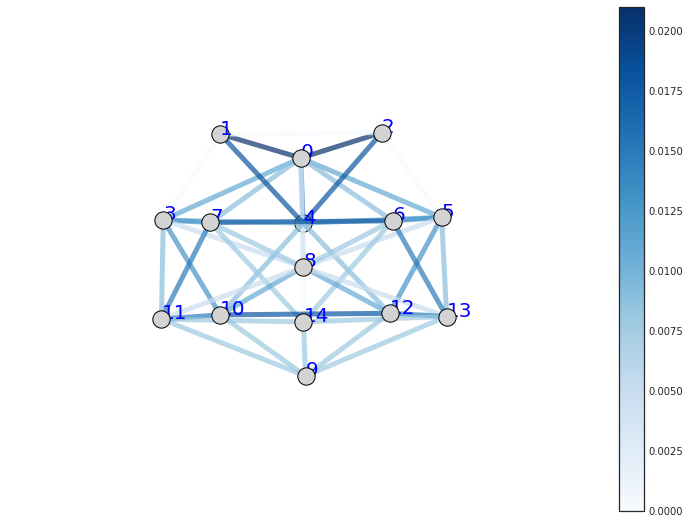

In [116]:
G_draw_edge(G_15, np.float64(tedge_vec15['op_mean'].values), xyz_15)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

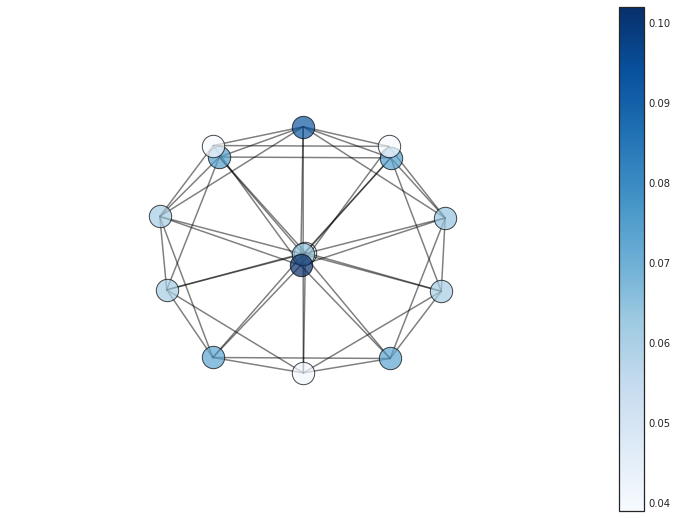

In [151]:
G_draw_node(Gw_15, np.float64(tnode_vec15['op_mean'].values), xyz_15, 90, 0)
# plt.title('edge based torsion_op_mean, 78, view=(0,0)', fontsize=20)